### Imports

In [1]:
import numpy as _np
import matplotlib.pyplot as _plt
import pandas as _pd
import glob as _gl
import pymad8 as _m8
import pybdsim as _bd
import beamTracking
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

Welcome to JupyROOT 6.26/04


### Date and prefix

In [2]:
date = "2023_01_26"
save_name_prefix = "plots/BeamTracking/" + date + "_T20_plot"

# Track Class Definition

In [16]:
paramdict = {'x' : {'mean': 0, 'std': 10e-6},
             'xp': {'mean': 0, 'std': 10e-6},
             'y' : {'mean': 0, 'std': 10e-6},
             'yp': {'mean': 0, 'std': 10e-6},
             'z' : {'mean': 0, 'std': 30e-6}, #30e-6
             'DE': {'mean': 0, 'std': 3e6}, #3e6
            }

In [17]:
Track_Collection = beamTracking.setTrackCollection(10000, 14, paramdict,'../01_mad8/track_input_mad8','../03_bdsimModel/track_input_bdsim')
Track = beamTracking.setSamplersAndTrack("../01_mad8/TWISS_CL_T20", "../01_mad8/RMAT_CL_T20")

Mad8.readTwissFile > nrec=878
Mad8.readRmatFile > nrec=878


In [18]:
Track.RunPymad8Tracking(Track_Collection)

Mad8.tracking > 10000 particles and 878 samplers


In [19]:
# _bd.Run.Bdsim("../03_bdsimModel/T20_dens_1e-12.gmad", "../04_dataLocal/TEST_T20_with_userfile")
STOP

NameError: name 'STOP' is not defined

### BDSIM loading

In [ ]:
Track.LoadBdsimTrack("../04_dataLocal/T20_no_bias_for_tracking.root")

# TRAJECTORIES

In [ ]:
particle_number = 19
particle_initial_vector = Track.initial_dict[particle_number]
print("Particle {} with initial vector : {}".format(particle_number, particle_initial_vector))

#S=0
#S=53
#S=220.9
S=68.5
sampler_name = Track.twiss.getNameByNearestS(S)
sampler_S = Track.twiss.getRowByNearestS(S)['S'].tolist()[0]
print("Sampler {} at position S = {} m".format(sampler_name, sampler_S))

In [ ]:
_plt.figure(figsize=(14, 9))

_plt.subplot(2, 1, 1)
for particle_number in range(10,20):
    Track.PlotTrajectory(particle_number, 'X')

_plt.subplot(2, 1, 2)
for particle_number in range(10,20):
    Track.PlotTrajectory(particle_number, 'Y')
    
_m8.Plot.AddMachineLatticeToFigure(_plt.gcf(), Track.twiss)
_plt.title("Sample of particle trajectories in both planes", fontsize=15)
    
_plt.savefig("{}_Multiple_Particle_trajectories_both_planes".format(save_name_prefix), dpi=300, bbox_inches='tight')

In [ ]:
#_plt.figure(figsize=(14, 15))
fig, ax = _plt.subplots(4,1,figsize=(18,10), gridspec_kw={'height_ratios': [1, 1, 2, 1]}, sharex='all')

_plt.subplot(4, 1, 1)
Track.PlotTrajectory(particle_number, 'X', bdsimCompare=True)
_plt.xlabel(None)

_plt.subplot(4, 1, 2)
Track.PlotTrajectory(particle_number, 'Y', bdsimCompare=True)
_plt.xlabel(None)

_plt.subplot(4, 1, 3)
Track.PlotTrajectory(particle_number, 'X', bdsimCompare=True, relativePlots=True)
Track.PlotTrajectory(particle_number, 'Y', bdsimCompare=True, relativePlots=True)
_plt.xlabel(None)
#_plt.ylim([-1e-10,6e-10])

if True:
    _plt.subplot(4, 1, 4)
    Track.twiss.plotXY('S', 'DX')
    Track.twiss.plotXY('S', 'DY')
    _plt.xlabel('S [m]')
    _plt.ylabel('Disp [m]')
    _plt.legend()

_m8.Plot.AddMachineLatticeToFigure(_plt.gcf(), Track.twiss)
_plt.title("Particle trajectory in both planes", fontsize=15)

#_plt.xlim([150,230])

_plt.savefig("{}_Particle_trajectory_both_planes".format(save_name_prefix), dpi=300, bbox_inches='tight')

In [ ]:
#_plt.figure(figsize=(14, 9))
fig, ax = _plt.subplots(4,1,figsize=(18,10), gridspec_kw={'height_ratios': [1, 1, 2, 1]}, sharex='all')

_plt.subplot(4, 1, 1)
Track.PlotTrajectory(particle_number, 'PX', bdsimCompare=True)
_plt.xlabel(None)

_plt.subplot(4, 1, 2)
Track.PlotTrajectory(particle_number, 'PY', bdsimCompare=True)
_plt.xlabel(None)

_plt.subplot(4, 1, 3)
Track.PlotTrajectory(particle_number, 'PX', bdsimCompare=True, relativePlots=True)
Track.PlotTrajectory(particle_number, 'PY', bdsimCompare=True, relativePlots=True)
_plt.xlabel(None)

if True :
    _plt.subplot(4, 1, 4)
    Track.twiss.plotXY('S', 'DPX')
    Track.twiss.plotXY('S', 'DPY')
    _plt.xlabel('S [m]')
    _plt.ylabel('Disp_p [rad]')
    _plt.legend()

_m8.Plot.AddMachineLatticeToFigure(_plt.gcf(), Track.twiss)
_plt.title("Particle angular trajectory in both planes", fontsize=15)

_plt.savefig("{}_Particle_trajectory_derivate_both_planes".format(save_name_prefix), dpi=300, bbox_inches='tight')

In [ ]:
_plt.figure(figsize=(21, 6))

_plt.subplot(1, 3, 1)
Track.PlotPhaseSpace(S, 'X', linFit=True)

_plt.subplot(1, 3, 2)
Track.PlotPhaseSpace(S, 'Y', linFit=True)

_plt.subplot(1, 3, 3)
Track.PlotPhaseSpace(S, 'T')

_plt.savefig("{}_Phase_space_at_one_sampler_in_both_planes".format(save_name_prefix), dpi=300, bbox_inches='tight')

In [ ]:
_plt.figure(figsize=(21, 12))

_plt.subplot(2, 3, 1)
Track.PlotHist(S, 'X')

_plt.subplot(2, 3, 2)
Track.PlotHist(S, 'Y')

_plt.subplot(2, 3, 3)
Track.PlotHist(S, 'T')

_plt.subplot(2, 3, 4)
Track.PlotHist(S, 'PX')

_plt.subplot(2, 3, 5)
Track.PlotHist(S, 'PY')

_plt.subplot(2, 3, 6)
Track.PlotHist(S, 'PT')


_plt.savefig("{}_Beam_profile_at_one_sampler_in_all_coordinates".format(save_name_prefix), dpi=300, bbox_inches='tight')

 # CORRELATION


In [ ]:
S = 142
#S = 68.5

index = Track.twiss.getIndexByNearestS(S)
ref_index = Track.twiss.getIndexByNames('IP.LUXE.T20')

_plt.figure(figsize=(18, 7))

_plt.subplot(1, 2, 1)
Track.PlotCorrelation(index, 'Y', ref_index, 'PX', linFit=True)

_plt.subplot(1, 2, 2)
Track.PlotCorrelation(index, 'X', ref_index, 'PY', linFit=True)

#_plt.subplot(2, 2, 2)
#Track.PlotCorrelation(index, 'X', ref_index, 'Y')

#_plt.subplot(2, 2, 3)
#Track.PlotCorrelation(index, 'X', ref_index, 'PX')

#_plt.subplot(2, 2, 4)
#Track.PlotCorrelation(index, 'X', ref_index, 'PY')


_plt.savefig("{}_Beam_profile_at_one_sampler_compared_to_IP_in_all_coordinates".format(save_name_prefix), dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Fit of the Theory curve in all coordinates')

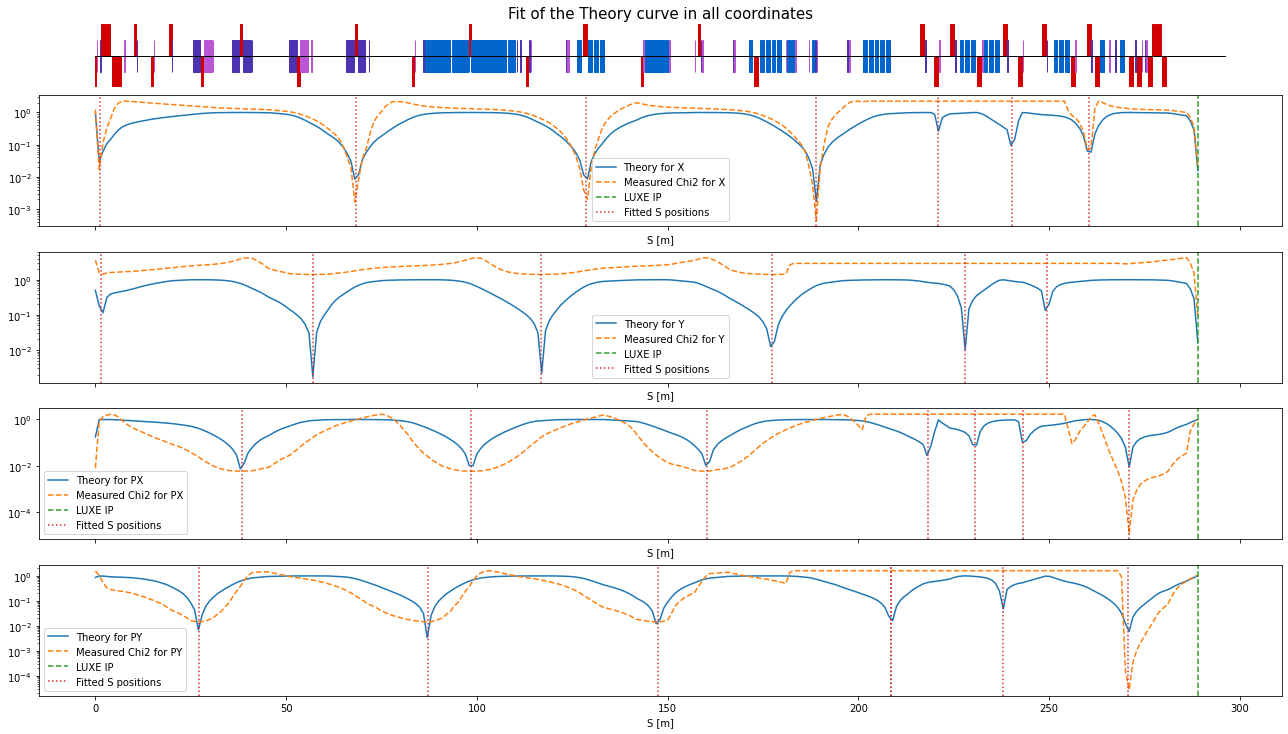

In [20]:
inital_fit = [[1, 70, 130, 180, 220, 240, 260],
              [40, 100, 160, 215, 230, 245, 270],
              [1, 50, 100, 175, 225, 250],
              [25, 100, 150, 200, 225, 240, 265],]
THEORY, CHI2, S_list = beamTracking.TheoryFitAndChi2(Track, 'IP.LUXE.T20', inital_fit)
beamTracking.PlotTheoryFitAndChi2(Track, THEORY, CHI2, S_list)
_m8.Plot.AddMachineLatticeToFigure(_plt.gcf(), Track.twiss)
_plt.title("Fit of the Theory curve in all coordinates", fontsize=15)

### Phase space

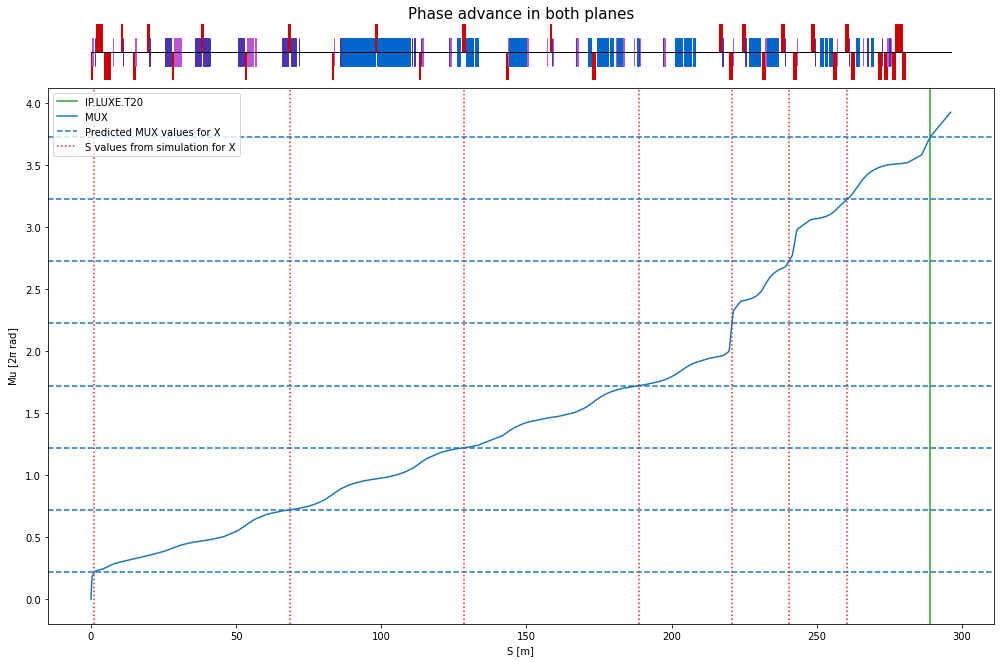

In [8]:
_plt.figure(figsize=(14, 9))
beamTracking.PlotPhaseAdvanceCheck(Track, 'X', S_list)
_m8.Plot.AddMachineLatticeToFigure(_plt.gcf(), Track.twiss)
_plt.title("Phase advance in both planes", fontsize=15)
_plt.savefig("{}_Phase_advance_in_both_planes".format(save_name_prefix), dpi=300, bbox_inches='tight')

## SINGULAR VALUE DECOMPOSITION

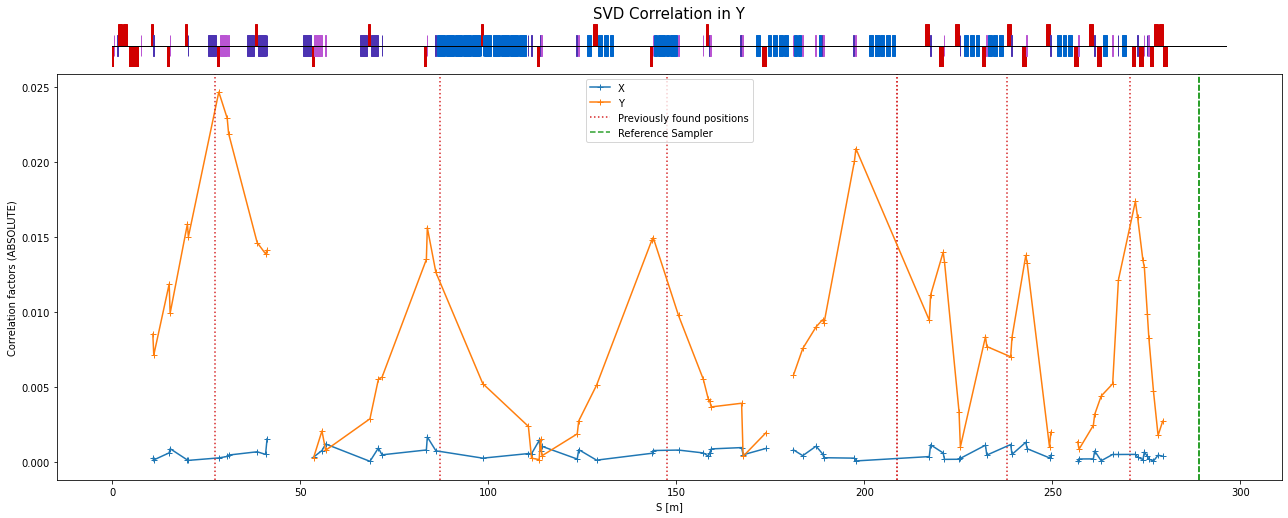

In [21]:
_plt.figure(figsize=(18,7))
#BPM_list=['QUAD']
BPM_list=['QUAD','HKIC','VKIC']

#beamTracking.PlotBPMSVD(Track, predicted_S_list=S_list['X'], plotRef=True)
#beamTracking.PlotBPMSVD(Track, BPM_list=BPM_list, BPM_list_type='type', s_range=[10,300], noise=10e-6, predicted_S_list=S_list['X'], plotRef=True)
#beamTracking.PlotBPMSVD(Track, BPM_list=BPM_list, BPM_list_type='type', s_range=[0,20], noise=1e-8, predicted_S_list=S_list['X'], plotRef=True)


#beamTracking.PlotBPMSVD(Track, ref_coord='X', BPM_list=BPM_list, BPM_list_type='type', s_range=[0.1,20], predicted_S_list=S_list['X'], plotRef=True)
#beamTracking.PlotBPMSVD(Track, ref_coord='X', BPM_list=BPM_list, BPM_list_type='type', s_range=[50,230])
#beamTracking.PlotBPMSVD(Track, ref_coord='X', BPM_list=BPM_list, BPM_list_type='type', s_range=[230,265])

#beamTracking.PlotBPMSVD(Track, ref_coord='PX', BPM_list=BPM_list, BPM_list_type='type', s_range=[25,75], predicted_S_list=S_list['PX'], plotRef=True)
#beamTracking.PlotBPMSVD(Track, ref_coord='PX', BPM_list=BPM_list, BPM_list_type='type', s_range=[75,175])
#beamTracking.PlotBPMSVD(Track, ref_coord='PX', BPM_list=BPM_list, BPM_list_type='type', s_range=[190,250])
#beamTracking.PlotBPMSVD(Track, ref_coord='PX', BPM_list=BPM_list, BPM_list_type='type', s_range=[250,280])

#beamTracking.PlotBPMSVD(Track, ref_coord='Y', BPM_list=BPM_list, BPM_list_type='type', s_range=[0.1,15], predicted_S_list=S_list['Y'], plotRef=True)
#beamTracking.PlotBPMSVD(Track, ref_coord='Y', BPM_list=BPM_list, BPM_list_type='type', s_range=[30,200])
#beamTracking.PlotBPMSVD(Track, ref_coord='Y', BPM_list=BPM_list, BPM_list_type='type', s_range=[220,270])

beamTracking.PlotBPMSVD(Track, ref_coord='PY', BPM_list=BPM_list, BPM_list_type='type', s_range=[10,50], predicted_S_list=S_list['PY'], printLabels=True)
beamTracking.PlotBPMSVD(Track, ref_coord='PY', BPM_list=BPM_list, BPM_list_type='type', s_range=[50,175])
beamTracking.PlotBPMSVD(Track, ref_coord='PY', BPM_list=BPM_list, BPM_list_type='type', s_range=[180,250])
beamTracking.PlotBPMSVD(Track, ref_coord='PY', BPM_list=BPM_list, BPM_list_type='type', s_range=[250,280])


#beamTracking.PlotBPMSVD(Track, ref_coord='PX', BPM_list=S_list['PX'], mean_sub=False, noise=10e-6, predicted_S_list=S_list['PX'], plotRef=True)

_m8.Plot.AddMachineLatticeToFigure(_plt.gcf(), Track.twiss)
_plt.title("SVD Correlation in Y", fontsize=15)
_plt.savefig("{}_SVD_Correlation_in_Y".format(save_name_prefix), dpi=300, bbox_inches='tight')

## RESOLUTION

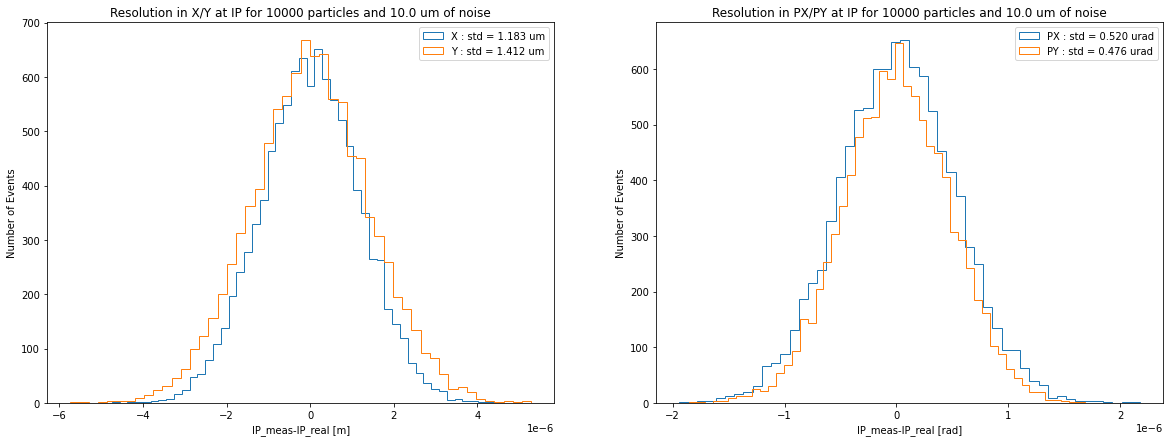

In [22]:
noise = 10e-6
_plt.figure(figsize=(20,7))
_plt.subplot(1, 2, 1)
beamTracking.PlotResolution(Track, 'X', 'IP.LUXE.T20', S_list, noise=noise)
beamTracking.PlotResolution(Track, 'Y', 'IP.LUXE.T20', S_list, noise=noise)
_plt.title('Resolution in X/Y at IP for {} particles and {} um of noise'.format(len(Track.initial_dict),noise*1e6))
_plt.subplot(1, 2, 2)
beamTracking.PlotResolution(Track, 'PX', 'IP.LUXE.T20', S_list, noise=noise)
beamTracking.PlotResolution(Track, 'PY', 'IP.LUXE.T20', S_list, noise=noise)
_plt.title('Resolution in PX/PY at IP for {} particles and {} um of noise'.format(len(Track.initial_dict),noise*1e6))

_plt.savefig("{}_Resolution_at_the_IP_using_SVD".format(save_name_prefix), dpi=300, bbox_inches='tight')

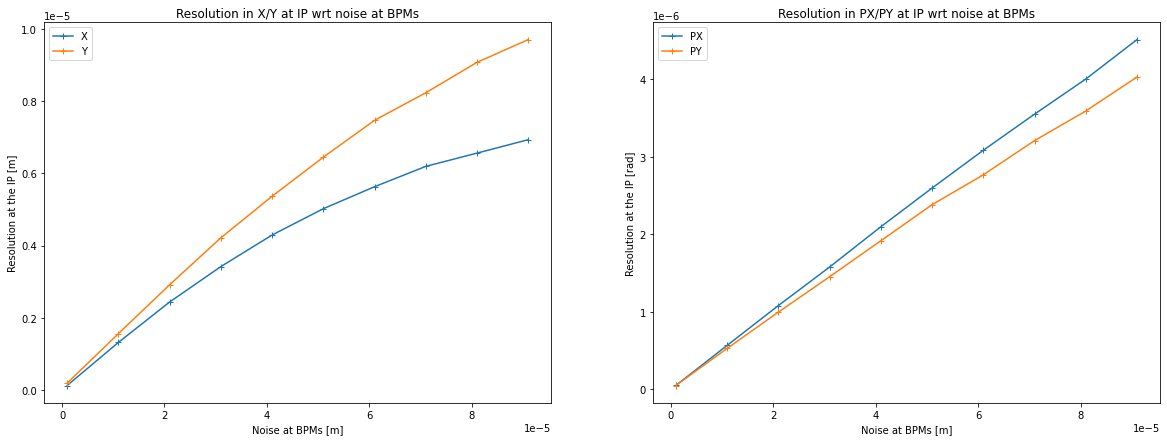

In [23]:
noise_range = _np.arange(1e-6,1e-4,10e-6)
_plt.figure(figsize=(20,7))
_plt.subplot(1, 2, 1)
beamTracking.PlotResWrtBPMnoise(Track, 'X', 'IP.LUXE.T20', S_list, noise_range)
beamTracking.PlotResWrtBPMnoise(Track, 'Y', 'IP.LUXE.T20', S_list, noise_range)
_plt.title('Resolution in X/Y at IP wrt noise at BPMs')
_plt.subplot(1, 2, 2)
beamTracking.PlotResWrtBPMnoise(Track, 'PX', 'IP.LUXE.T20', S_list, noise_range)
beamTracking.PlotResWrtBPMnoise(Track, 'PY', 'IP.LUXE.T20', S_list, noise_range)
_plt.title('Resolution in PX/PY at IP wrt noise at BPMs')

_plt.savefig("{}_Resolution_at_the_IP_wrt_BPM_noise".format(save_name_prefix), dpi=300, bbox_inches='tight')

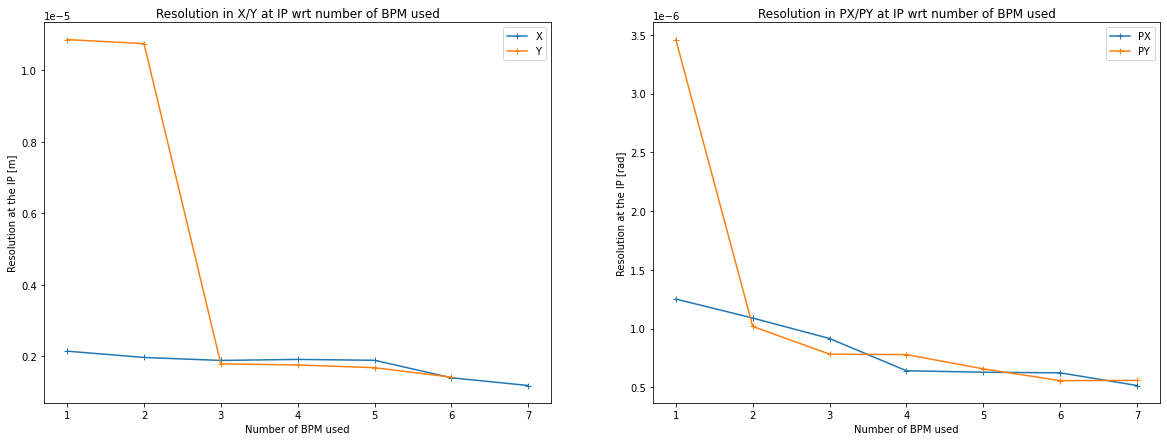

In [25]:
noise = 10e-6
sortcoeff=True
_plt.figure(figsize=(20,7))
_plt.subplot(1, 2, 1)
beamTracking.PlotResWrtNumberOfBPM(Track, 'X', 'IP.LUXE.T20', S_list, noise=noise, sortcoeff=sortcoeff)
beamTracking.PlotResWrtNumberOfBPM(Track, 'Y', 'IP.LUXE.T20', S_list, noise=noise, sortcoeff=sortcoeff)
_plt.title('Resolution in X/Y at IP wrt number of BPM used')
_plt.subplot(1, 2, 2)
beamTracking.PlotResWrtNumberOfBPM(Track, 'PX', 'IP.LUXE.T20', S_list, noise=noise, sortcoeff=sortcoeff)
beamTracking.PlotResWrtNumberOfBPM(Track, 'PY', 'IP.LUXE.T20', S_list, noise=noise, sortcoeff=sortcoeff)
_plt.title('Resolution in PX/PY at IP wrt number of BPM used')

_plt.savefig("{}_Resolution_at_the_IP_wrt_number_of_BPM".format(save_name_prefix), dpi=300, bbox_inches='tight')

In [ ]:
L = 289.06 - 280.55
_np.arctan(1.121e-6/2)*1e6